# Exploratory data analysis (EDA)


## Data cleaning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(
    "data/sysselsattning_MYH.xlsx", skiprows=3, index_col=0, skipfooter=6
).drop("Övrigt")
df.head()


,2014\n(avser examinerade 2013),2015\n(avser examinerade 2014),2016\n(avser examinerade 2015),2017\n(avser examinerade 2016),2018\n(avser examinerade 2017),2019\n(avser examinerade 2018),2020\n(avser examinerade 2019),2021\n(avser examinerade 2020)
Utbildningsområde,,,,,,,,
Data/It,77 ± 3,78 ± 2,84 ± 2,91 ± 2,90 ± 2,90 ± 2,84 ± 2,84 ± 2
"Ekonomi, administration och försäljning",90 ± 1,91 ± 1,93 ± 1,94 ± 1,94 ± 1,96 ± 1,91 ± 1,90 ± 1
Friskvård och kroppsvård,88 ± 5,85 ± 6,90 ± 5,92 ± 6,95 ± 5,..,83 ± 10,87 ± 9
"Hotell, restaurang och turism",86 ± 2,88 ± 2,88 ± 2,89 ± 3,86 ± 3,91 ± 3,74 ± 3,76 ± 4
Hälso- och sjukvård samt socialt arbete,92 ± 1,95 ± 1,96 ± 1,95 ± 1,95 ± 1,93 ± 1,93 ± 1,94 ± 1


In [2]:
df.columns = [year for year in range(2013, 2021)]
df.head()


,2013,2014,2015,2016,2017,2018,2019,2020
Utbildningsområde,,,,,,,,
Data/It,77 ± 3,78 ± 2,84 ± 2,91 ± 2,90 ± 2,90 ± 2,84 ± 2,84 ± 2
"Ekonomi, administration och försäljning",90 ± 1,91 ± 1,93 ± 1,94 ± 1,94 ± 1,96 ± 1,91 ± 1,90 ± 1
Friskvård och kroppsvård,88 ± 5,85 ± 6,90 ± 5,92 ± 6,95 ± 5,..,83 ± 10,87 ± 9
"Hotell, restaurang och turism",86 ± 2,88 ± 2,88 ± 2,89 ± 3,86 ± 3,91 ± 3,74 ± 3,76 ± 4
Hälso- och sjukvård samt socialt arbete,92 ± 1,95 ± 1,96 ± 1,95 ± 1,95 ± 1,93 ± 1,93 ± 1,94 ± 1


---

## Divide df into mean and uncertainty

### Theory on confidence interval

Original format: mean percentage ± uncertainty, which is a way to represent the 95% confidence interval of the data. Note that confidence interval is a statistical term based on a true parameter of a distribution that is unknown and the data that we see is a sample drawn from this distribution. Given that we draw infinite amount of samples from this distribution we get that 95% of the times the sample is captured within the given confidence interval. Also as it's not stated in the data we can assume that the confidence interval is calculated using standard normal distribution.

We need to divide the dataframe into two dataframes where one only has thet means and the other has the uncertainties.


In [3]:
df = df.replace("..", np.nan)  # in order to do interpolation on missing values

df_uncertainty = df.apply(lambda element: element.str[-2:])
df_uncertainty = df_uncertainty.astype(float).interpolate(axis=1)
df_uncertainty.to_csv("data/sysselsattning_MYH_cleaned_uncertainty.csv")
df_uncertainty.head()


,2013,2014,2015,2016,2017,2018,2019,2020
Utbildningsområde,,,,,,,,
Data/It,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
"Ekonomi, administration och försäljning",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Friskvård och kroppsvård,5.0,6.0,5.0,6.0,5.0,7.5,10.0,9.0
"Hotell, restaurang och turism",2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0
Hälso- och sjukvård samt socialt arbete,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
df_mean = df.apply(lambda element: element.str[:2]).astype(float).interpolate(axis=1)
df_mean.to_csv("data/sysselsattning_MYH_cleaned_mean.csv")
df_mean.head()


,2013,2014,2015,2016,2017,2018,2019,2020
Utbildningsområde,,,,,,,,
Data/It,77.0,78.0,84.0,91.0,90.0,90.0,84.0,84.0
"Ekonomi, administration och försäljning",90.0,91.0,93.0,94.0,94.0,96.0,91.0,90.0
Friskvård och kroppsvård,88.0,85.0,90.0,92.0,95.0,89.0,83.0,87.0
"Hotell, restaurang och turism",86.0,88.0,88.0,89.0,86.0,91.0,74.0,76.0
Hälso- och sjukvård samt socialt arbete,92.0,95.0,96.0,95.0,95.0,93.0,93.0,94.0


## Visualizations

- the visualizations below needs some makeover


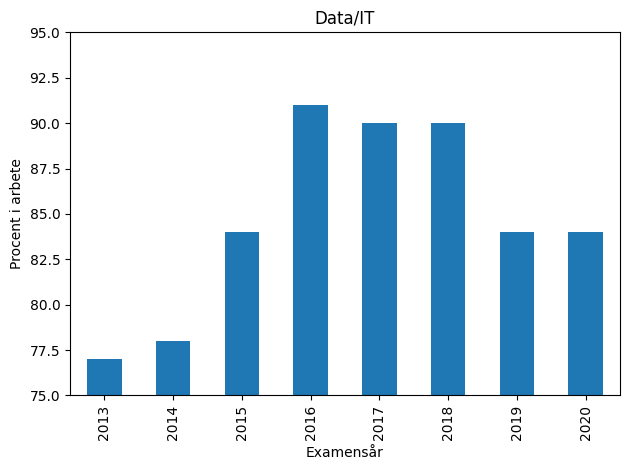

In [5]:
fig, ax = plt.figure(), plt.axes()
df_mean.loc["Data/It"].plot(kind="bar", ax=ax)
ax.set(xlabel="Examensår", ylabel="Procent i arbete", title="Data/IT", ylim=[75, 95])
fig.tight_layout()
fig.savefig("visualizations/sysselsattning/nonzero_baseline_bar.png")

# this chart is deceiving as when we read bar charts we compare relative heights of the bars
# since the baseline is not at zero we skew the visual comparison
# https://www.storytellingwithdata.com/blog/2012/09/bar-charts-must-have-zero-baseline


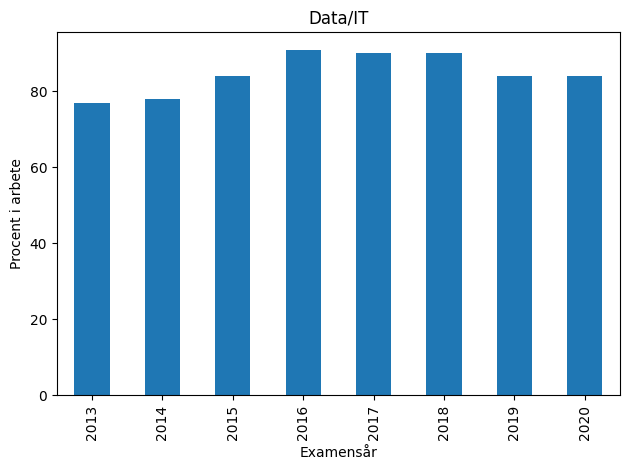

In [6]:
fig, ax = plt.figure(), plt.axes()
df_mean.loc["Data/It"].plot(kind="bar", ax=ax)
ax.set(xlabel="Examensår", ylabel="Procent i arbete", title="Data/IT")
fig.tight_layout()
fig.savefig("visualizations/sysselsattning/zero_baseline_bar.png")


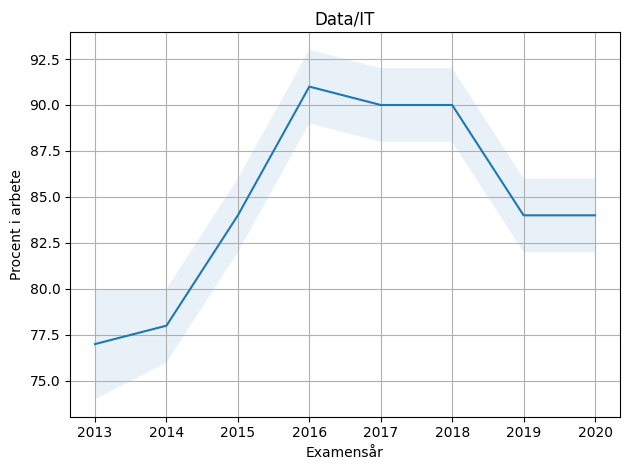

In [7]:
# testing one plot
fig, ax = plt.figure(), plt.axes()
df_mean.loc["Data/It"].plot(ax=ax)
lower_uncertainty = df_mean.loc["Data/It"] - df_uncertainty.loc["Data/It"]
upper_uncertainty = df_mean.loc["Data/It"] + df_uncertainty.loc["Data/It"]

ax.fill_between(
    lower_uncertainty.index, lower_uncertainty, upper_uncertainty, alpha=0.1
)

ax.set(xlabel="Examensår", ylabel="Procent i arbete", title="Data/IT")
ax.grid()
fig.tight_layout()
fig.savefig("visualizations/sysselsattning/line_clutter.png")


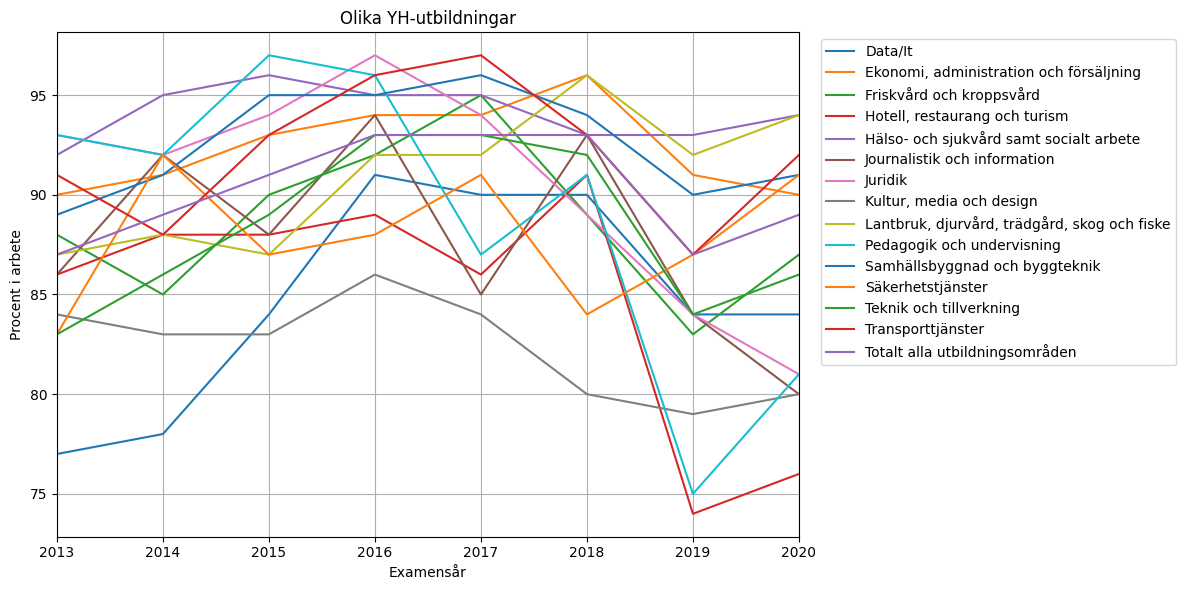

In [8]:
fig, ax = plt.figure(figsize=(12, 6)), plt.axes()
df_mean.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set(
    title="Olika YH-utbildningar",
    ylabel="Procent i arbete",
    xlabel="Examensår",
    xlim=[2013, 2020],
)
ax.grid()
fig.tight_layout()
fig.savefig("visualizations/sysselsattning/multiple_trends_cluttered.png")


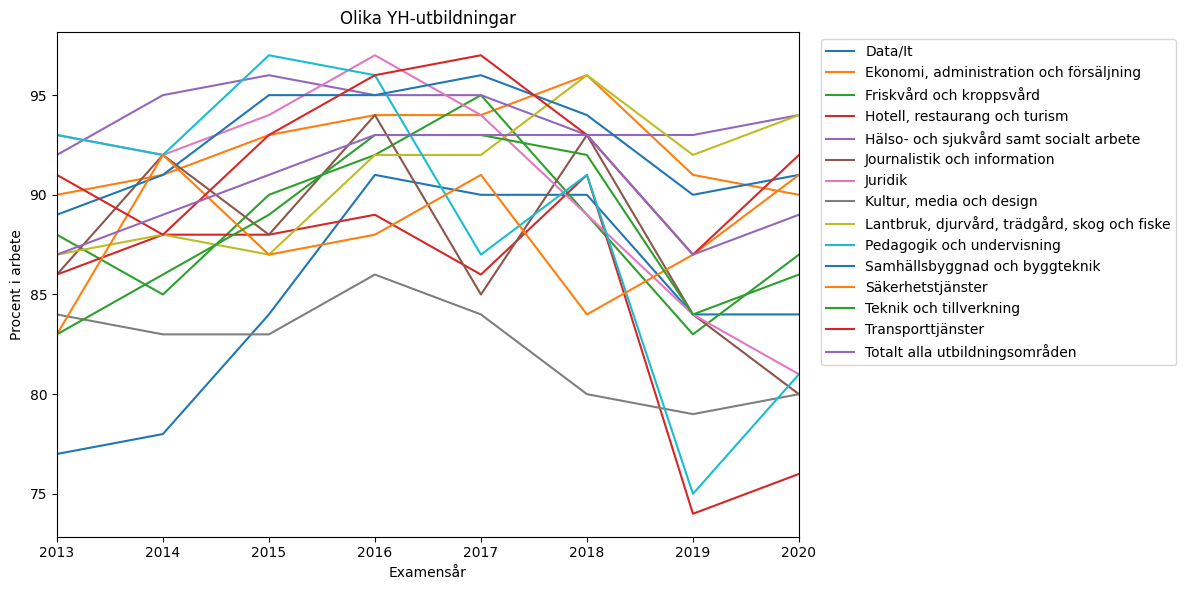

In [9]:
fig, ax = plt.figure(figsize=(12, 6)), plt.axes()


df_mean.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set(
    title="Olika YH-utbildningar",
    ylabel="Procent i arbete",
    xlabel="Examensår",
    xlim=[2013, 2020],
)

fig.tight_layout()


## Makeover 1

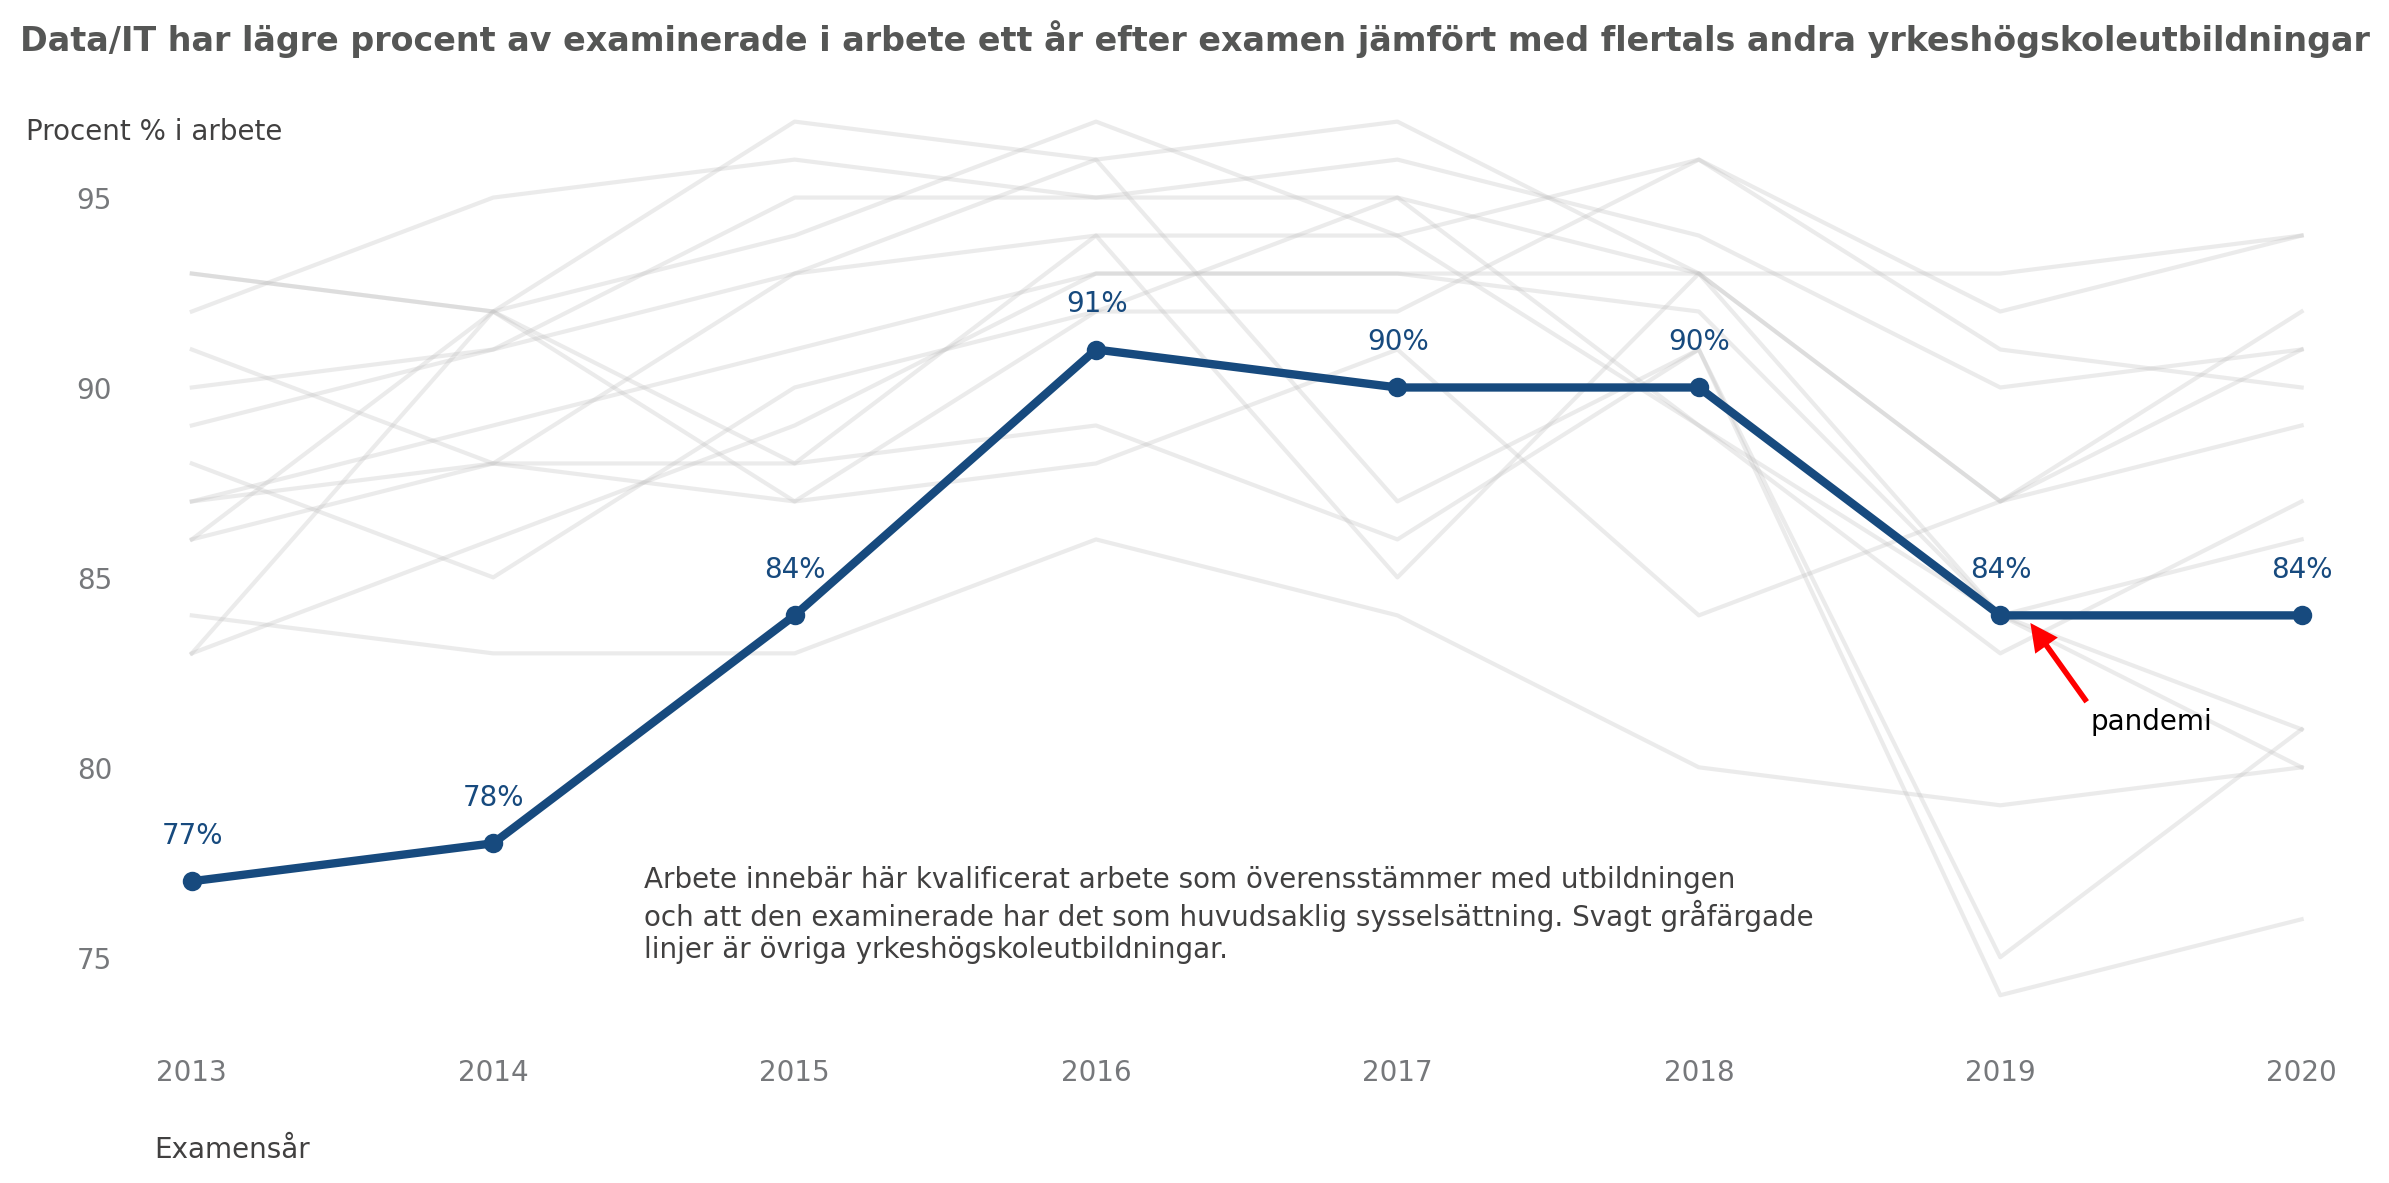

In [10]:
from utils import PlotSettings
from colors import *

fig, ax = plt.figure(figsize=(12, 6), dpi=200), plt.axes()

ax = (
    PlotSettings(ax)
    .remove_borders()
    .set_ticklabel_color(GRAY5)
    .set_labels(xlabel="Examensår", ylabel="Procent % i arbete")
    .ax
)
colors = [BLUE1] + [GRAY9] * (len(df_mean) - 1)


for subject in df_mean.index:
    plot_kwargs = {"color": GRAY9, "alpha": 0.3}
    if subject == "Data/It":
        plot_kwargs.update({"color": BLUE1, "linewidth": 3, "alpha": 1, "zorder": 99})

    linestyle = "-o" if subject == "Data/It" else "-"
    ax.plot(df_mean.loc[subject], linestyle, **plot_kwargs)


# ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set(
    xlim=[2012.8, 2020.2],
)

ax.set_title(
    "Data/IT har lägre procent av examinerade i arbete ett år efter examen jämfört med flertals andra yrkeshögskoleutbildningar",
    loc="left",
    pad=10,
    x=-0.05,
    color=GRAY3,
    fontweight ="bold"
)


data_it_series = df_mean.loc["Data/It"]

for year, percentage in zip(data_it_series.index, data_it_series):
    ax.annotate(f"{percentage:.0f}%", xy=(year - 0.1, percentage + 1), color=BLUE1)

ax.annotate(
    "Arbete innebär här kvalificerat arbete som överensstämmer med utbildningen\noch att den examinerade har det som huvudsaklig sysselsättning. Svagt gråfärgade\
    \nlinjer är övriga yrkeshögskoleutbildningar.",
    xy=(2014.5, 75),
    color=GRAY2,
)

ax.annotate(
    "pandemi",
    xy=(2019.1, 83.8),
    xytext=(2019.3, 81),
    arrowprops={
        "facecolor": "red",
        "width": 2,
        "headwidth": 10,
        "headlength": 10,
        "edgecolor": "none",
    },
)

fig.tight_layout()
fig.savefig("visualizations/sysselsattning/multiple_trends_makeover.png")

## Makeover 2

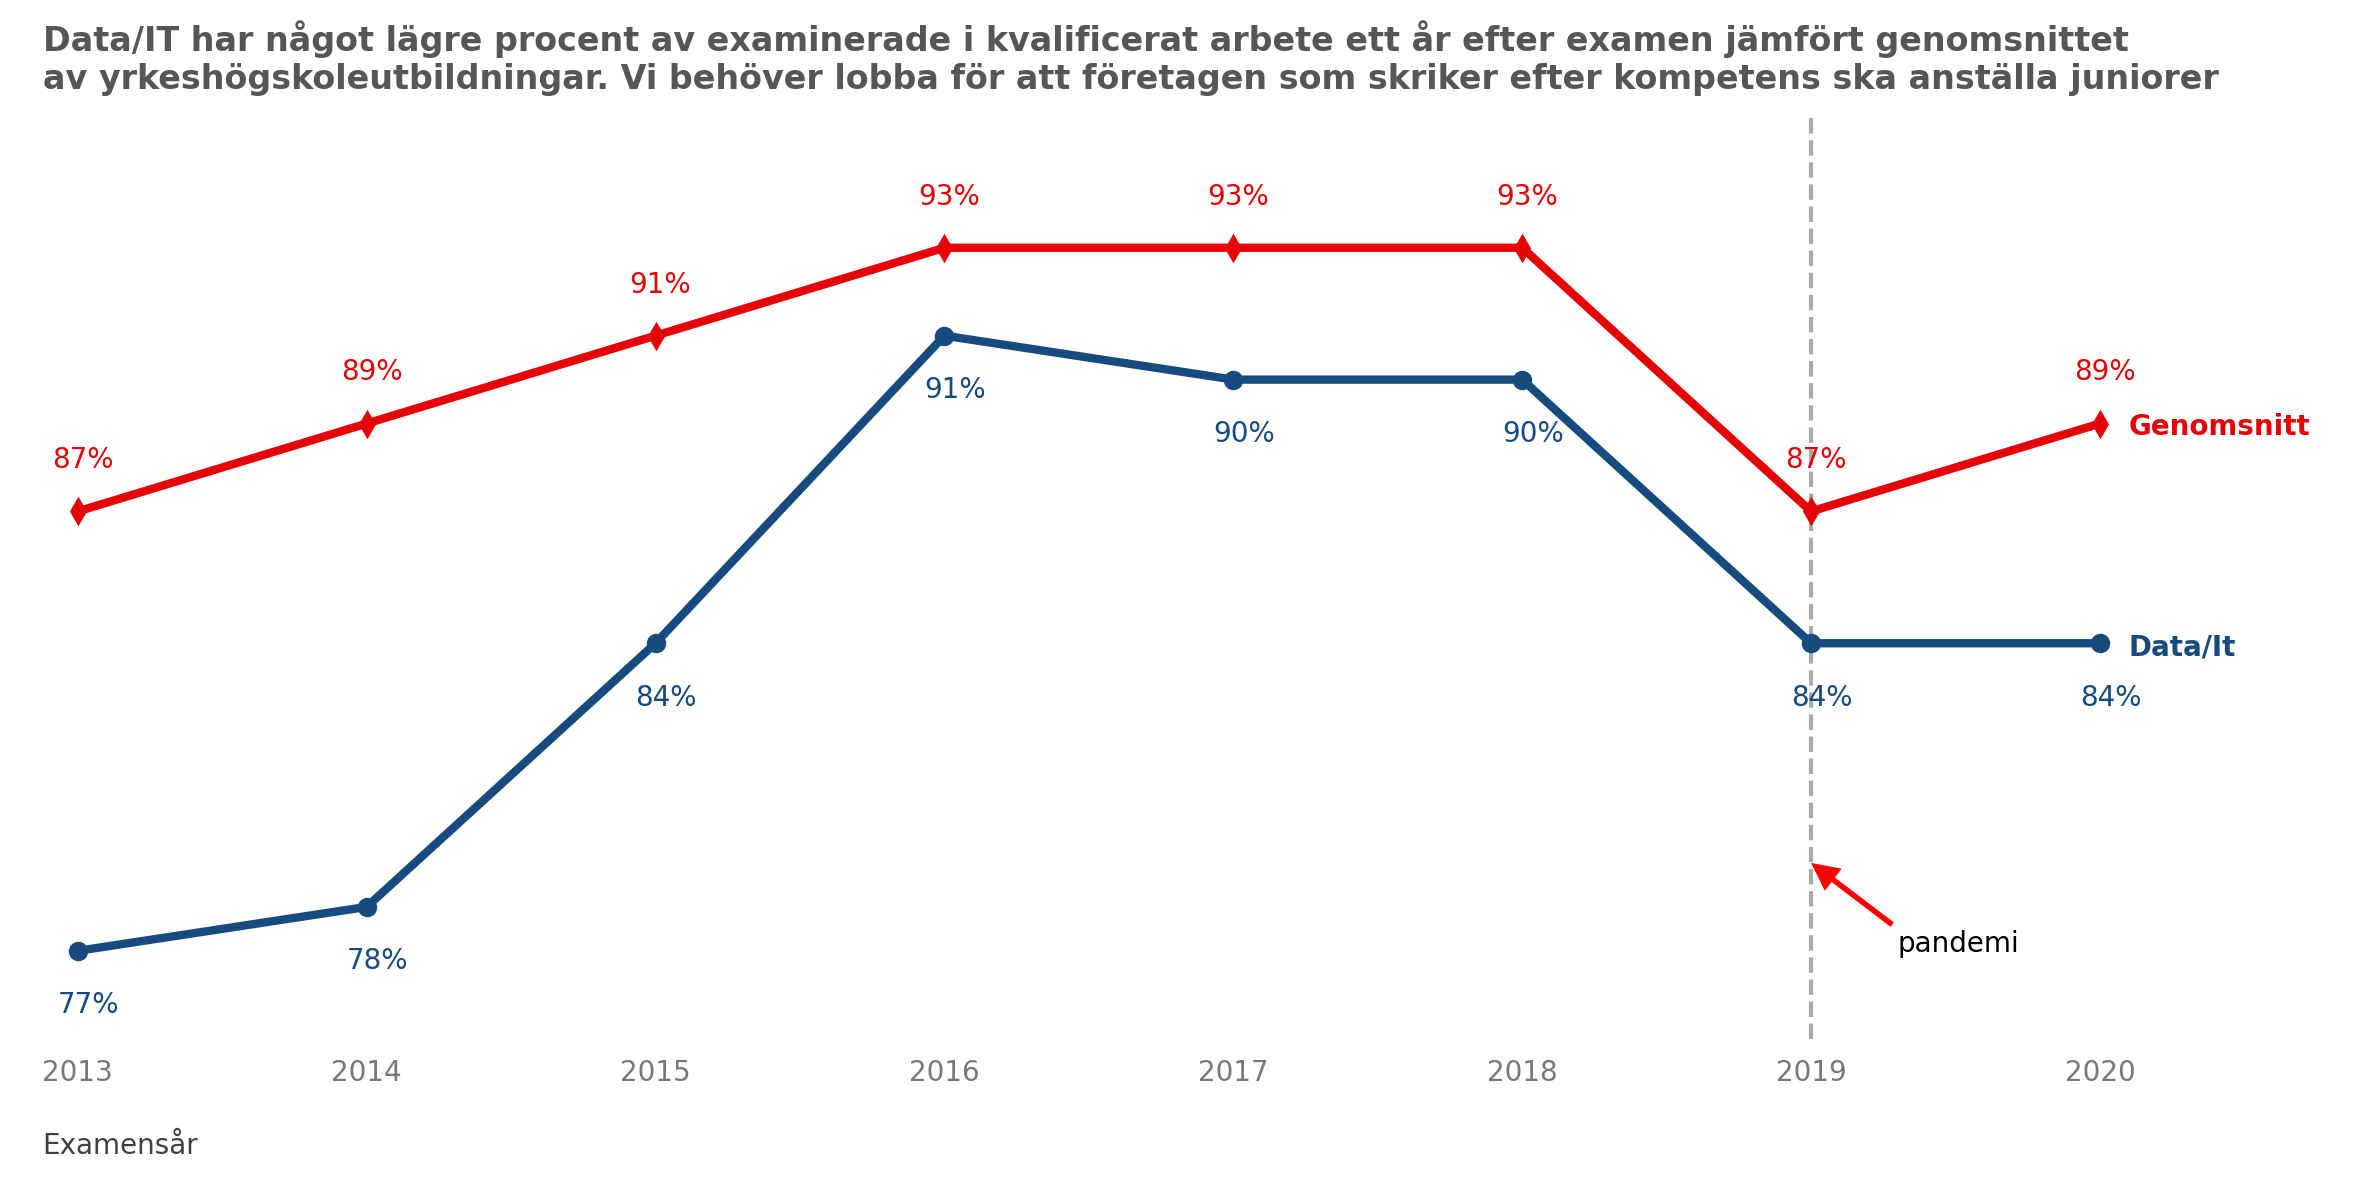

In [15]:
from utils import PlotSettings, AnnotateLine
from colors import *

fig, ax = plt.figure(figsize=(12, 6), dpi=200), plt.axes()

ax = (
    PlotSettings(ax)
    .remove_borders()
    .set_ticklabel_color(GRAY5)
    .set_labels(
        xlabel="Examensår", ylabel="Procent % i arbete", xlabel_position=(0.043, -0.1)
    )
    .remove_yaxis()
    .ax
)
colors = [BLUE1] + [GRAY9] * (len(df_mean) - 1)

offsets = ({"x_offset": -0.07, "y_offset": -1.4}, {"x_offset": -0.09, "y_offset": 1})

for subject, offset in zip(["Data/It", "Totalt alla utbildningsområden"], offsets):
    plot_color = BLUE1 if subject == "Data/It" else RED5
    plot_kwargs.update({"color": plot_color, "linewidth": 3, "alpha": 1, "zorder": 99})

    linestyle = "-o" if subject == "Data/It" else "-d"
    subject_series = df_mean.loc[subject]
    ax.plot(subject_series, linestyle, **plot_kwargs)

    AnnotateLine(ax).annoatate_line(
        subject_series.index,
        subject_series,
        symbol_character="%",
        color=plot_color,
        **offset,
    )

ax.set(xlim=[2012.8, 2020.9], ylim=[75, 96])

ax.set_title(
    "Data/IT har något lägre procent av examinerade i kvalificerat arbete ett år efter examen jämfört genomsnittet\
        \nav yrkeshögskoleutbildningar. Vi behöver lobba för att företagen som skriker efter kompetensska anställa juniorer",
    loc="left",
    pad=10,
    x=0.01,
    color=GRAY3,
    fontweight="bold",
)

ax.annotate("Genomsnitt", xy=(2020.1, 88.75), color = RED5, fontweight="bold")
ax.annotate("Data/It", xy=(2020.1, 83.75), color = BLUE1, fontweight="bold")



ax.annotate(
    "pandemi",
    xy=(2019, 79),
    xytext=(2019.3, 77),
    arrowprops={
        "facecolor": "red",
        "width": 2,
        "headwidth": 10,
        "headlength": 10,
        "edgecolor": "none",
    },
)

ax.axvline(x=2019, color = GRAY3, linestyle="--", zorder=-1, alpha=.5)

fig.tight_layout()
fig.savefig("visualizations/sysselsattning/multiple_trends_makeover2.png")


In [12]:
for subject in zip(["Data/It", "Totalt alla utbildningsområden"]):
    print(subject)

('Data/It',)
('Totalt alla utbildningsområden',)
